<a href="https://colab.research.google.com/github/mehtab-alam/mehtabalamshah-gmail.com/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install Pre-requisite libraries**

In [107]:
pip install tweet-preprocessor

**2. Import the necessary packages**

In [108]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pickle
import preprocessor as p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

n_gram_max = 1
n_gram_min = 1 


**3. Mount google drive, read dataset CSV file and print the top 10 rows of dataset.** 

**Note: In my case i uploaded the dataset (*training.1.6.processed.csv*) already on Google Drive in the google colab folder**

In [109]:
# Mount again if it is needed in case
pd.set_option('display.max_columns', None) 
drive.mount('/content/gdrive', force_remount= True)
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/training.1.6.noemoticon.csv', encoding='latin1')
print("Shape of df:",df.shape)
print("Counts:\n",df.target.value_counts())
df.head(10)

Mounted at /content/gdrive
Shape of df: (1599999, 6)
Counts:
 4    800000
0    799999
Name: target, dtype: int64


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


**3.1. Plot the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


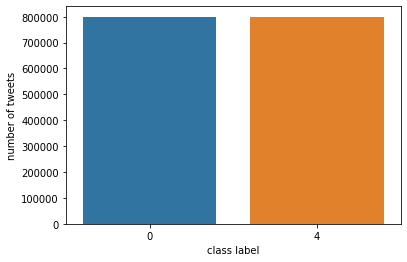

In [110]:
# 
sns.countplot(df.target,)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

**3.2. Plot histogram of labelled data**

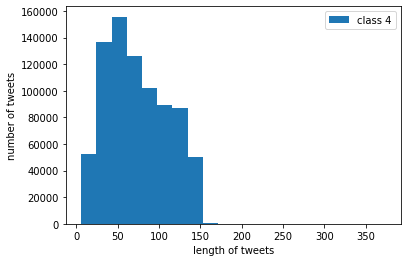

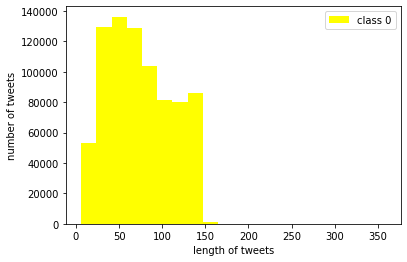

In [111]:
plt.hist(df[df['target']==4].text.str.len(),bins=20,label='class 4')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['target']==0].text.str.len(),color='yellow',bins=20,label='class 0')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

**4. Print the unique sentiment(targets column) in the datset**

In [112]:
df['target'].unique()

array([0, 4])

**5. Method to remove punction from text**

In [113]:
def preprocessing(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    final = p.clean(final)
    final = str.lower(final)
    return final

**6. Clean the text using Tweet-Preprocess Library and clean punctuations too**

In [114]:
#df['text'] = df['text'].apply(p.clean) 
#df['text'] = df['text'].apply(remove_punctuation)
#df['text'] = df['text'].apply(str.lower)
df['text'] = df['text'].apply(preprocessing)

df['text']

0          is upset that he can't update his facebook by ...
1          i dived many times for the ball managed to sav...
2             my whole body feels itchy and like its on fire
3          no, it's not behaving at all i'm mad why am i ...
4                                         not the whole crew
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom - very cool to hear old walt intervi...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy th birthday to my boo of alll time tupac...
1599998                                                happy
Name: text, Length: 1599999, dtype: object

**7. Create a new dataframe including two columns(text -> Cleaned text), (target -> sentiment score). Print it**

In [115]:
dfNew = df[['target','text']]
dfNew.head()

,target,text
0,0,is upset that he can't update his facebook by ...
1,0,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it's not behaving at all i'm mad why am i ..."
4,0,not the whole crew


**8. Split train and test data with 80% and 20%**

In [116]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

train.head()
#test.head()

,target,id,date,flag,user,text,random_number
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,-1.329241
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,-0.042633
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all i'm mad why am i ...",0.404797
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew,0.561952
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"hey long time no see yes rains a bit ,only a b...",0.229233


**9. Extract features using BOW Count Vectorizer from train and test data**

In [117]:
#vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
vectorizer = CountVectorizer(ngram_range=(n_gram_min, n_gram_max), # to use bigrams ngram_range=(2,2)
                           lowercase = True ,stop_words='english')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

**9.1. Extract features using TF-IDF Vectorizer from train and test data**

In [ ]:
#vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
vectorizer = TfidfVectorizer(ngram_range=(n_gram_min, n_gram_max), # to use bigrams ngram_range=(2,2)
                           lowercase = True ,stop_words='english')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

**10. Create logistic regression model with default hyper parameters**

In [118]:
lr = LogisticRegression()

**11. Assign train and test data to the model**

In [119]:
X_train = train_matrix
X_test = test_matrix
y_train = train['target']
y_test = test['target']

**12. Fit train and test data**

In [120]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**12.1- Save Logistic regression model**

In [121]:
#torch.save(lr.state_dict(), "/content/gdrive/MyDrive/Colab Notebooks/datasets/logistic_regression.pt")

pickle.dump(lr, open("/content/gdrive/MyDrive/Colab Notebooks/datasets/logistic_regression.sav", 'wb'))

**12.2- Load Logistic regression model**

In [82]:
lr = pickle.load(open("/content/gdrive/MyDrive/Colab Notebooks/datasets/logistic_regression.sav", 'rb'))

**13. Check the prediction of model using test data**

In [122]:
print (X_test)

predictions = lr.predict(X_test)

  (0, 51136)	1
  (0, 63571)	1
  (0, 101267)	1
  (0, 196081)	1
  (0, 268585)	1
  (0, 277306)	1
  (0, 316394)	1
  (1, 155883)	1
  (1, 216867)	1
  (2, 99136)	1
  (2, 141740)	1
  (2, 171948)	1
  (2, 264748)	1
  (2, 291885)	1
  (2, 335767)	1
  (2, 365801)	1
  (3, 45803)	1
  (3, 50933)	1
  (3, 70421)	1
  (4, 59451)	1
  (4, 79881)	1
  (4, 319269)	1
  (5, 159959)	1
  (5, 274982)	1
  (6, 97425)	1
  :	:
  (339094, 319269)	1
  (339094, 325210)	1
  (339094, 341353)	1
  (339094, 360591)	1
  (339095, 76118)	1
  (339095, 195166)	1
  (339096, 280078)	1
  (339097, 168543)	1
  (339097, 169853)	1
  (339097, 218987)	1
  (339097, 366996)	1
  (339098, 81810)	1
  (339098, 105114)	1
  (339098, 120079)	1
  (339098, 160596)	1
  (339098, 165031)	1
  (339098, 177575)	1
  (339098, 199904)	1
  (339098, 307623)	1
  (339098, 313193)	1
  (339098, 319269)	1
  (339099, 102511)	1
  (339099, 135312)	1
  (339099, 159959)	1
  (339099, 333521)	1


**14. Print confusion matrix for logistic regression model**




In [123]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[126925,  34401],
       [ 42482, 135292]])

**15. Evaluate regression model for sentiment analysis with precision, recall, accuracy and F-Score**

In [124]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    161326
           4       0.80      0.76      0.78    177774

    accuracy                           0.77    339100
   macro avg       0.77      0.77      0.77    339100
weighted avg       0.77      0.77      0.77    339100



## Support vector machine Algorithm

**1. Create Random Forest Model**

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False), LinearSVC())

**2. Train SVC Model**

In [ ]:
# Train the model on training data
#rf.fit(X_train, y_train)
clf.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
#                ('svc', LinearSVC())])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

**3.1. Save SVC Model**

In [ ]:
pickle.dump(clf, open("/content/gdrive/MyDrive/Colab Notebooks/datasets/svm.sav", 'wb'))

**3.2. Load SVC Model**

In [ ]:
clf = pickle.load(open("/content/gdrive/MyDrive/Colab Notebooks/datasets/svm.sav", 'rb'))

**3. Check the prediction of model using test data**

In [ ]:
predictions = clf.predict(X_test)

**4. Print confusion matrix for Random forest model**

In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[119876,  48990],
       [ 49678, 121060]])

**5. Evaluate regression model for sentiment analysis with precision, recall, accuracy and F-Score**

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71    168866
           4       0.71      0.71      0.71    170738

    accuracy                           0.71    339604
   macro avg       0.71      0.71      0.71    339604
weighted avg       0.71      0.71      0.71    339604



# Loading Rémy dataset

In [125]:
re_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/extracted_geocoded_tweets.csv', encoding='latin1')
print("Shape of df:",re_df.shape)
#print("Counts:\n",re_df.sentiment.value_counts())
re_df.head(10)

Shape of df: (165538, 5)


,location,date,text,created_at,id
0,"-1.9643961, 52.505005",'2020-02-12T22:56:31.000Z','@AlexeiDankevich @V2019N Apparently thatâs ...,'Wed Feb 12 22:56:31 +0000 2020',1227728215717928961
1,"-0.0736289, 53.567738",'2020-02-12T22:56:25.000Z','This should be the official butial of United ...,'Wed Feb 12 22:56:25 +0000 2020',1227728189134381056
2,"-4.114052, 56.78611",'2020-02-12T22:56:15.000Z','You could NOT MAKE THIS SHIT UP. Did they not...,'Wed Feb 12 22:56:15 +0000 2020',1227728149221380098
3,"-0.116588406, 51.514427",'2020-02-12T22:56:49.000Z','Tesla Autopilot Gracefully Avoids Road Obstru...,'Wed Feb 12 22:56:49 +0000 2020',1227728293543104512
4,"12.674297, 42.638428",'2020-02-12T22:56:52.000Z','Ing.Gironi Will MWC 2020 be canceled over cor...,'Wed Feb 12 22:56:52 +0000 2020',1227728304976859137
5,"-0.1276474, 51.50732",'2020-02-12T22:56:56.000Z','Banchester United ey https://t.co/NBtf0uWXwW','Wed Feb 12 22:56:56 +0000 2020',1227728322915917824
6,"-0.2427336, 52.57258",'2020-02-12T22:57:15.000Z','No fucking way ð­ð­ð­ð­ https://t.co/...,'Wed Feb 12 22:57:15 +0000 2020',1227728399743045632
7,"-2.2451148, 53.47949",'2020-02-12T22:57:04.000Z','Trending: Odion Ighalo âBANNED from Manches...,'Wed Feb 12 22:57:04 +0000 2020',1227728355824410627
8,"-0.5402403, 52.79548",'2020-02-12T22:57:05.000Z','Wait so itâs more than Ighalo? ð­ð­ð­...,'Wed Feb 12 22:57:05 +0000 2020',1227728360475897856
9,"-0.1276474, 51.50732",'2020-02-12T22:57:45.000Z','@PatersonLou its not easy as then all countri...,'Wed Feb 12 22:57:45 +0000 2020',1227728528231235586


**1. Data Preprocessing of prediction dataset**

In [126]:
#re_df['text'] = re_df['text'].apply(p.clean) 
#re_df['text'] = re_df['text'].apply(remove_punctuation)
#re_df['text'] = re_df['text'].apply(str.lower)
re_df['processed_text'] = re_df['text'].apply(preprocessing)
re_df.head(5)

,location,date,text,created_at,id,processed_text
0,"-1.9643961, 52.505005",'2020-02-12T22:56:31.000Z','@AlexeiDankevich @V2019N Apparently thatâs ...,'Wed Feb 12 22:56:31 +0000 2020',1227728215717928961,' apparently thats to do with them reaching ca...
1,"-0.0736289, 53.567738",'2020-02-12T22:56:25.000Z','This should be the official butial of United ...,'Wed Feb 12 22:56:25 +0000 2020',1227728189134381056,'this should be the official butial of united ...
2,"-4.114052, 56.78611",'2020-02-12T22:56:15.000Z','You could NOT MAKE THIS SHIT UP. Did they not...,'Wed Feb 12 22:56:15 +0000 2020',1227728149221380098,'you could not make this shit up did they not ...
3,"-0.116588406, 51.514427",'2020-02-12T22:56:49.000Z','Tesla Autopilot Gracefully Avoids Road Obstru...,'Wed Feb 12 22:56:49 +0000 2020',1227728293543104512,'tesla autopilot gracefully avoids road obstru...
4,"12.674297, 42.638428",'2020-02-12T22:56:52.000Z','Ing.Gironi Will MWC 2020 be canceled over cor...,'Wed Feb 12 22:56:52 +0000 2020',1227728304976859137,'inggironi will mwc be canceled over coronavir...


In [127]:
# predict_lr = lr.predict(re_df['text'])


pred_matrix = vectorizer.transform(re_df['text'])

pred =  lr.predict(pred_matrix)

re_df['sentiment'] = pred 
print("Counts:\n",re_df.sentiment.value_counts())

#spatial_df = re_df[['location','text','sentiment']] 
re_df[['location','text','sentiment']].head()

Counts:
 0    84640
4    80898
Name: sentiment, dtype: int64


,location,text,sentiment
0,"-1.9643961, 52.505005",'@AlexeiDankevich @V2019N Apparently thatâs ...,0
1,"-0.0736289, 53.567738",'This should be the official butial of United ...,4
2,"-4.114052, 56.78611",'You could NOT MAKE THIS SHIT UP. Did they not...,0
3,"-0.116588406, 51.514427",'Tesla Autopilot Gracefully Avoids Road Obstru...,4
4,"12.674297, 42.638428",'Ing.Gironi Will MWC 2020 be canceled over cor...,0
